In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# untuk plot Q-Q
import scipy.stats as stats
# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### 1. Eksplorasi Data untuk Visualisasi 

- Pahami struktur dataset dan jenis variabel yang tersedia. 
- Identifikasi variabel mana yang dapat memberikan insight jika 
divisualisasikan. 
- Pastikan data sudah siap untuk divisualisasikan tanpa banyak missing values 
atau inkonsistensi. 

Goal: Memahami dataset sebelum membuat visualisasi yang bermakna.

#### 1.1. Struktur dataset dan jenis variabel

In [3]:
# simpan dataframe sbg variabel
df = pd.read_csv('Telco_customer_churn.csv')
pd.set_option('future.no_silent_downcasting', True)
data = df.copy()

In [4]:
# Cek duplikat
len(data.drop_duplicates())/ len(data)

1.0

In [5]:
# cek infobar dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [6]:
# get those count, mean, std, min, max, etc
data.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [7]:
# bentuk dataframe
data.shape

(7043, 33)

In [8]:
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


#### 1.2. Variabel Mana yg Dapat Memberikan Insight Jika Divisualisasikan?

- **_Customer Lifetime Value (CLTV) is the total revenue or profit a business expects to earn from a customer over the entire duration of their relationship._**

It helps companies understand:

How valuable a customer is in the long run

How much they can spend to acquire or retain that customer

CLTV = Average Purchase Value × Purchase Frequency × Customer Lifespan

**Columns that can be discussed for insight(s)**:
CLTV, Contract, Total Charges, Churn Label, Churn Score, Internet Services, Tenure Months, Monthly Charges, Country, State, City, Gender, Senior Citizen, Partner, Dependents, Phone Service, Multilines, Online Security, Online Backup, Device Protection

In [19]:
# Cek jenis variabel
categorical_cols = data.select_dtypes(include='object').columns.tolist()
numerical_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()

print("kolom kategorikal: ", categorical_cols)
print("numerical columns: ", numerical_cols)
int_cols = data.select_dtypes(include='int64')
display(int_cols.head())
float_cols = data.select_dtypes(include='float64')
display(float_cols.head())

# Get numerical columns and their types
numerical_info = [[col, data[col].dtype.name] for col in numerical_cols]

# Display as a 2D array
for row in numerical_info:
    print(row)

kolom kategorikal:  ['CustomerID', 'Country', 'State', 'City', 'Lat Long', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Total Charges', 'Churn Label', 'Churn Reason']
numerical columns:  ['Count', 'Zip Code', 'Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges', 'Churn Value', 'Churn Score', 'CLTV']


,Count,Zip Code,Tenure Months,Churn Value,Churn Score,CLTV
0,1,90003,2,1,86,3239
1,1,90005,2,1,67,2701
2,1,90006,8,1,86,5372
3,1,90010,28,1,84,5003
4,1,90015,49,1,89,5340


,Latitude,Longitude,Monthly Charges
0,33.964131,-118.272783,53.85
1,34.059281,-118.307420,70.70
2,34.048013,-118.293953,99.65
3,34.062125,-118.315709,104.80
4,34.039224,-118.266293,103.70


['Count', 'int64']
['Zip Code', 'int64']
['Latitude', 'float64']
['Longitude', 'float64']
['Tenure Months', 'int64']
['Monthly Charges', 'float64']
['Churn Value', 'int64']
['Churn Score', 'int64']
['CLTV', 'int64']


**1. Histogram untuk Monthly Charges**

Tujuan: Apakah biaya bulanan tinggi berhubungan dengan churn?

Interpretasi: Distribusi miring ke kanan bisa menunjukkan pelanggan dengan biaya tinggi lebih mungkin churn.

**2. Boxplot CLTV vs Churn Label**

Tujuan: Apakah nilai pelanggan (CLTV) rendah sering churn?

Interpretasi: Jika boxplot churn memiliki median CLTV lebih rendah, maka CLTV rendah mungkin indikator churn.

**3. Countplot untuk Contract vs Churn Label**

Tujuan: Apakah jenis kontrak memengaruhi churn?

Interpretasi: Jika pelanggan dengan "Month-to-Month" banyak yang churn, bisa disarankan perusahaan fokus menawarkan kontrak lebih panjang.

**4. KDE Plot Tenure Months by Churn Label**

Tujuan: Seberapa lama pelanggan bertahan sebelum churn?

Interpretasi: Puncak distribusi churn di tenure rendah artinya churn banyak terjadi pada pelanggan baru.

#### 1.3. Missing Value Handling

In [9]:
# Cek missing values
missing = data.isna().sum()
print("missing values:\n", missing[missing > 0])

missing values:
 Churn Reason    5174
dtype: int64


In [10]:
5174/7043*100 
# big value of 73.5% actually allows churn reason to be deleted since it doesn't allow any proper statistical yield

73.4630129206304

In [11]:
data['Churn Reason'].dropna().unique().tolist()

['Competitor made better offer',
 'Moved',
 'Competitor had better devices',
 'Competitor offered higher download speeds',
 'Competitor offered more data',
 'Price too high',
 'Product dissatisfaction',
 'Service dissatisfaction',
 'Lack of self-service on Website',
 'Network reliability',
 'Limited range of services',
 'Lack of affordable download/upload speed',
 'Long distance charges',
 'Extra data charges',
 "Don't know",
 'Poor expertise of online support',
 'Poor expertise of phone support',
 'Attitude of service provider',
 'Attitude of support person',
 'Deceased']

Since there is an option "Don't know", it's pretty logical to say that you can replace NaN with this reason. But, it's obviously the customer doesn't care about the product if he or she didn't fill in this. There's another option, the customer hasn't churned the product!

In [12]:
data['Churn Label'].value_counts()
# hey it's no for 5174, so all who hasn't churn has value NaN, which means... 
# if you want to check the reason of those who churned, you can just take those 1869 people

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

In [13]:
# To show only null columns as sample
data[data.isna().any(axis=1)][data.columns[data.isna().any()]].head()

,Churn Reason
1869,NaN
1870,NaN
1871,NaN
1872,NaN
1873,NaN


In [13]:
# Check if there's any missing variables other than NaN
# loop kolom dan cek unique value and count how many of them
for column in data.columns:
    print(f"============= {column} =================")
    display(data[column].value_counts())
    print()
# actually never mind, just ask data engineer. this part is too long for me now.

============= CustomerID =================


CustomerID
3186-AJIEK    1
3668-QPYBK    1
9237-HQITU    1
7203-OYKCT    1
9837-FWLCH    1
9710-NJERN    1
4807-IZYOZ    1
1471-GIQKQ    1
0666-UXTJO    1
9053-EJUNL    1
1685-BQULA    1
6691-CCIHA    1
2274-XUATA    1
9347-AERRL    1
6075-SLNIL    1
4501-VCPFK    1
9586-JGQKH    1
0052-YNYOT    1
0928-XUTSN    1
4080-OGPJL    1
0390-DCFDQ    1
2372-HWUHI    1
3091-FYHKI    1
6207-WIOLX    1
4412-YLTKF    1
0404-SWRVG    1
5299-RULOA    1
4846-WHAFZ    1
0486-HECZI    1
3192-NQECA    1
4598-XLKNJ    1
0278-YXOOG    1
8637-XJIVR    1
9191-MYQKX    1
5919-TMRGD    1
7825-ECJRF    1
1285-OKIPP    1
2472-OVKUP    1
1024-GUALD    1
1918-ZBFQJ    1
9367-WXLCH    1
6317-YPKDH    1
2070-FNEXE    1
2656-FMOKZ    1
0691-JVSYA    1
1875-QIVME    1
3445-HXXGF    1
3376-BMGFE    1
0867-MKZVY    1
3874-EQOEP    1
2135-RXIHG    1
4385-GZQXV    1
6323-AYBRX    1
3606-TWKGI    1
7273-TEFQD    1
4959-JOSRX    1
9514-JDSKI    1
4629-NRXKX    1
0322-YINQP    1
9947-OTFQU    1
0094-OIFMO    1
1251-KRREG   


============= Count =================


Count
1    7043
Name: count, dtype: int64


============= Country =================


Country
United States    7043
Name: count, dtype: int64


============= State =================


State
California    7043
Name: count, dtype: int64


============= City =================


City
Los Angeles               305
San Diego                 150
San Jose                  112
Sacramento                108
San Francisco             104
Fresno                     64
Long Beach                 60
Oakland                    52
Stockton                   44
Bakersfield                40
Glendale                   40
Berkeley                   32
Riverside                  32
Pasadena                   30
Whittier                   30
Irvine                     28
San Bernardino             28
Santa Barbara              28
Anaheim                    28
Modesto                    28
Inglewood                  25
Torrance                   25
Santa Monica               25
Burbank                    25
Chula Vista                25
Santa Rosa                 24
Santa Ana                  24
Rancho Cucamonga           20
Escondido                  20
Salinas                    20
Van Nuys                   20
Orange                     20
Garden Grove               20
Coron


============= Zip Code =================


Zip Code
92284    5
92275    5
92268    5
90710    5
90704    5
90660    5
90631    5
90606    5
90602    5
90504    5
90403    5
90303    5
90301    5
90292    5
90262    5
90255    5
90211    5
90065    5
90063    5
91207    5
91206    5
91204    5
91202    5
91107    5
91106    5
91103    5
91042    5
91024    5
91016    5
91001    5
90804    5
90745    5
90731    5
90720    5
90712    5
91746    5
91744    5
91732    5
91731    5
91723    5
91722    5
91605    5
91601    5
91504    5
91411    5
91402    5
91381    5
91352    5
91350    5
91345    5
91304    5
92004    5
91948    5
91934    5
91931    5
91905    5
91902    5
91901    5
91803    5
91791    5
91773    5
91770    5
91768    5
91766    5
91764    5
91762    5
91748    5
92122    5
92116    5
92108    5
92105    5
92104    5
92103    5
92082    5
92066    5
92061    5
92060    5
92059    5
92057    5
92029    5
92020    5
92014    5
92009    5
92307    5
92301    5
92274    5
92273    5
92259    5
92258    5
92257    5
9


============= Lat Long =================


Lat Long
34.159534, -116.425984    5
33.28156, -115.955541     5
34.201108, -116.593456    5
33.798266, -118.300237    5
33.391181, -118.421305    5
33.989524, -118.089299    5
33.940619, -117.9513      5
33.976678, -118.065875    5
33.972119, -118.020188    5
33.867257, -118.330794    5
34.031529, -118.491156    5
33.936291, -118.332639    5
33.956445, -118.358634    5
33.977468, -118.445475    5
33.923573, -118.200669    5
33.97803, -118.217141     5
34.063947, -118.383001    5
34.108833, -118.229715    5
34.044271, -118.185237    5
34.182378, -118.262922    5
34.162515, -118.203869    5
34.136306, -118.26036     5
34.167926, -118.267539    5
34.159007, -118.087353    5
34.139402, -118.128658    5
34.167465, -118.165327    5
34.296574, -118.244839    5
34.168686, -118.057505    5
34.1528, -118.000482      5
34.196837, -118.142236    5
33.783047, -118.1486      5
33.822295, -118.26411     5
33.736387, -118.284363    5
33.79499, -118.065591     5
33.840524, -118.148403    5
34.038983, 


============= Latitude =================


Latitude
34.159534    5
33.281560    5
34.201108    5
33.798266    5
33.391181    5
33.989524    5
33.940619    5
33.976678    5
33.972119    5
33.867257    5
34.031529    5
33.936291    5
33.956445    5
33.977468    5
33.923573    5
33.978030    5
34.063947    5
34.108833    5
34.044271    5
34.182378    5
34.162515    5
34.136306    5
34.167926    5
34.159007    5
34.139402    5
34.167465    5
34.296574    5
34.168686    5
34.152800    5
34.196837    5
33.783047    5
33.822295    5
33.736387    5
33.794990    5
33.840524    5
34.038983    5
34.031441    5
34.074492    5
34.079934    5
34.084747    5
34.097345    5
34.207295    5
34.169200    5
34.213049    5
34.178470    5
34.223768    5
34.364153    5
34.231053    5
34.502432    5
34.266389    5
34.224377    5
33.200369    5
32.830852    5
32.649787    5
32.857946    5
32.677097    5
32.671170    5
32.827184    5
34.074736    5
34.061634    5
34.102119    5
34.065108    5
34.067932    5
34.042286    5
34.074087    5
34.057256    5
3


============= Longitude =================


Longitude
-121.994813    8
-116.593456    5
-118.300237    5
-118.348083    5
-118.272783    5
-118.285150    5
-118.238728    5
-118.240413    5
-118.251977    5
-118.200577    5
-118.446333    5
-118.287596    5
-118.402447    5
-118.308441    5
-118.222274    5
-118.249826    5
-118.308933    5
-118.430656    5
-118.397040    5
-118.274186    5
-117.991372    5
-118.148403    5
-118.065591    5
-118.284363    5
-118.264110    5
-118.148600    5
-118.142236    5
-118.000482    5
-118.057505    5
-118.244839    5
-118.165327    5
-118.128658    5
-118.087353    5
-118.267539    5
-118.260360    5
-118.203869    5
-116.192313    5
-118.632656    5
-118.459744    5
-118.414590    5
-118.338307    5
-118.615583    5
-118.445461    5
-118.459472    5
-118.317651    5
-118.372498    5
-118.400022    5
-117.906736    5
-117.886844    5
-118.046695    5
-118.014620    5
-117.936436    5
-117.209774    5
-117.897367    5
-117.667677    5
-117.605618    5
-117.756106    5
-117.785168    5
-118


============= Gender =================


Gender
Male      3555
Female    3488
Name: count, dtype: int64


============= Senior Citizen =================


Senior Citizen
No     5901
Yes    1142
Name: count, dtype: int64


============= Partner =================


Partner
No     3641
Yes    3402
Name: count, dtype: int64


============= Dependents =================


Dependents
No     5416
Yes    1627
Name: count, dtype: int64


============= Tenure Months =================


Tenure Months
1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
9     119
70    119
12    117
10    116
6     110
13    109
68    100
15     99
11     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
16     80
56     80
52     80
64     80
26     79
25     79
14     76
65     76
61     76
60     76
46     74
19     73
29     72
63     72
27     72
30     72
20     71
62     70
53     70
41     70
32     69
47     68
50     68
51     68
54     68
58     67
49     66
37     65
43     65
34     65
31     65
57     65
42     65
48     64
40     64
33     64
55     64
21     63
45     61
59     60
38     59
28     57
39     56
44     51
36     50
0      11
Name: count, dtype: int64


============= Phone Service =================


Phone Service
Yes    6361
No      682
Name: count, dtype: int64


============= Multiple Lines =================


Multiple Lines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


============= Internet Service =================


Internet Service
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


============= Online Security =================


Online Security
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


============= Online Backup =================


Online Backup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


============= Device Protection =================


Device Protection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


============= Tech Support =================


Tech Support
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


============= Streaming TV =================


Streaming TV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


============= Streaming Movies =================


Streaming Movies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


============= Contract =================


Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


============= Paperless Billing =================


Paperless Billing
Yes    4171
No     2872
Name: count, dtype: int64


============= Payment Method =================


Payment Method
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


============= Monthly Charges =================


Monthly Charges
20.05     61
19.85     45
19.90     44
19.95     44
19.65     43
20.00     43
19.70     43
20.15     40
19.55     40
20.25     39
19.75     39
19.80     38
20.35     38
20.10     37
19.60     37
20.20     35
19.50     32
19.40     31
20.45     31
20.40     30
20.50     28
19.45     28
20.30     28
20.55     27
19.35     25
19.30     24
20.65     23
25.25     20
25.10     19
19.25     18
84.80     17
19.20     17
20.75     17
25.00     17
74.40     16
24.45     15
81.00     15
20.85     15
24.80     15
20.60     15
25.05     14
70.15     14
79.85     14
80.45     14
79.20     14
25.15     14
95.00     13
20.70     13
89.85     13
89.55     13
69.95     13
75.35     13
80.85     13
70.30     12
85.45     12
80.55     12
24.70     12
24.95     12
74.90     12
55.00     12
84.30     12
85.30     12
19.10     12
94.40     12
25.40     12
75.50     12
74.95     11
50.15     11
74.30     11
24.40     11
19.15     11
80.00     11
45.00     11
99.00     11
90.05     11
75.10    


============= Total Charges =================


Total Charges
           11
20.2       11
19.75       9
19.9        8
20.05       8
19.65       8
19.55       7
45.3        7
20.15       6
19.45       6
20.25       6
20.3        5
20.45       5
75.3        4
69.65       4
69.6        4
19.5        4
74.7        4
70.6        4
20.4        4
44.4        4
49.9        4
50.15       4
19.4        4
69.9        4
20.5        4
69.95       4
44          4
20.35       4
19.95       4
19.3        4
19.85       4
19.2        4
74.35       3
44.75       3
70.45       3
55.7        3
45.7        3
69.55       3
74.6        3
74.9        3
20.1        3
24.8        3
70.15       3
69.25       3
50.6        3
74.3        3
69.1        3
84.5        3
1284.2      3
2317.1      3
45.1        3
19.25       3
20          3
45.85       3
20.9        3
50.45       3
19.1        3
50.75       3
75.35       3
70.1        3
470.2       3
305.55      3
85          3
20.55       3
86.05       3
79.55       3
85.5        3
80.55       3
25.25       3
383.65


============= Churn Label =================


Churn Label
No     5174
Yes    1869
Name: count, dtype: int64


============= Churn Value =================


Churn Value
0    5174
1    1869
Name: count, dtype: int64


============= Churn Score =================


Churn Score
80     151
71     148
77     145
67     143
68     141
76     141
70     140
69     140
78     138
72     137
65     136
66     135
75     129
74     128
79     126
73     126
43     104
59     104
26     101
46     101
38      96
54      96
49      96
27      95
33      92
56      91
30      90
52      90
39      88
57      88
55      88
42      87
53      87
51      86
24      86
40      85
25      85
62      85
21      84
35      84
20      83
22      82
48      81
28      81
64      80
29      80
45      79
63      79
23      78
58      77
44      75
47      75
32      74
37      74
34      73
31      73
60      73
36      72
41      71
61      69
82      66
87      65
97      64
90      64
50      63
83      59
89      59
81      56
99      54
96      52
86      50
98      50
100     50
85      50
84      49
92      48
93      47
94      46
91      45
95      43
88      33
9        3
8        2
7        2
5        1
Name: count, dtype: int64


============= CLTV =================


CLTV
5546    8
5092    7
5137    7
4745    7
4741    7
4369    7
5461    7
4115    7
5527    7
5915    7
2269    7
4883    6
4235    6
5096    6
4193    6
4133    6
5172    6
5980    6
4934    6
5687    6
4886    6
4283    6
5011    6
4580    6
5824    6
5707    6
3172    6
4162    6
4120    6
5154    6
5433    6
5295    6
4099    6
5795    6
4667    6
4149    6
4778    6
5651    6
4254    6
5157    6
4556    6
4535    6
4444    6
5597    6
4479    6
5225    6
5750    6
5811    5
4639    5
4858    5
4121    5
5536    5
5764    5
5613    5
4458    5
4648    5
4747    5
4017    5
5570    5
3740    5
5313    5
5715    5
2810    5
4993    5
4964    5
5514    5
4412    5
5602    5
5617    5
4368    5
3520    5
6466    5
4700    5
3878    5
5250    5
5203    5
4163    5
5863    5
3591    5
5825    5
4363    5
2893    5
4277    5
4094    5
5394    5
4517    5
5974    5
5453    5
5352    5
5409    5
5056    5
5274    5
5841    5
5644    5
4811    5
4969    5
5232    5
4621    5
5671    5
4118 


============= Churn Reason =================


Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Lack of affordable download/upload speed      44
Limited range of services                     44
Long distance charges                         44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

In [14]:
# percentage version
total_rows = len(data)

# Menghitung dan menampilkan persentase missing values di setiap kolom satu per satu
for column in data.columns:
    missing_count = data[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'CustomerID' Has 0 missing values (0.00%)
Column 'Count' Has 0 missing values (0.00%)
Column 'Country' Has 0 missing values (0.00%)
Column 'State' Has 0 missing values (0.00%)
Column 'City' Has 0 missing values (0.00%)
Column 'Zip Code' Has 0 missing values (0.00%)
Column 'Lat Long' Has 0 missing values (0.00%)
Column 'Latitude' Has 0 missing values (0.00%)
Column 'Longitude' Has 0 missing values (0.00%)
Column 'Gender' Has 0 missing values (0.00%)
Column 'Senior Citizen' Has 0 missing values (0.00%)
Column 'Partner' Has 0 missing values (0.00%)
Column 'Dependents' Has 0 missing values (0.00%)
Column 'Tenure Months' Has 0 missing values (0.00%)
Column 'Phone Service' Has 0 missing values (0.00%)
Column 'Multiple Lines' Has 0 missing values (0.00%)
Column 'Internet Service' Has 0 missing values (0.00%)
Column 'Online Security' Has 0 missing values (0.00%)
Column 'Online Backup' Has 0 missing values (0.00%)
Column 'Device Protection' Has 0 missing values (0.00%)
Column 'Tech Suppo

In [20]:
data = data.drop('Churn Reason', axis=1)

In [22]:
data.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV'],
      dtype='object')

In [23]:
# Handling missing value for EDA, without splitting
for column in data.columns:
    if data[column].dtype == 'object':
        # Isi dengan modus untuk tipe object
        data[column] = data[column].fillna(data[column].mode()[0])
    else:
        # Isi dengan median untuk tipe numerik
        data[column] = data[column].fillna(data[column].median())

In [24]:
data.isna().sum()

CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
dtype: int64

In [25]:
data.isnull().sum()

CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
dtype: int64

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

### 2. Visualisasi Distribusi Data 
- Pilih teknik visualisasi yang tepat, seperti histogram, boxplot, atau KDE plot. 
- Perhatikan penyebaran data, keberadaan outlier, dan pola distribusi. 
- Pastikan interpretasi dari hasil visualisasi membantu memahami karakteristik 
dataset.

Goal: Memahami sebaran data dan mendeteksi adanya outlier atau pola 
tertentu.

In [33]:
data['Churn Value'].unique()

array([1, 0])

In [36]:
data.columns.shape

(32,)

In [39]:
data[['Monthly Charges', 'CLTV', 'Tenure Months', 'Churn Label', 'Total Charges']].sample(5)

,Monthly Charges,CLTV,Tenure Months,Churn Label,Total Charges
5458,58.95,4815,48,No,2789.7
1449,88.40,2674,44,Yes,3912.9
6915,60.60,4077,48,No,2985.25
3329,19.60,4562,21,No,390.4
6248,50.70,3007,1,No,50.7


In [44]:
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')

In [61]:
def check_plot(df, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30, kde=True)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    plt.savefig(f'Dist of {col}.png')
    plt.show()

#### Ini adl univariate analysis

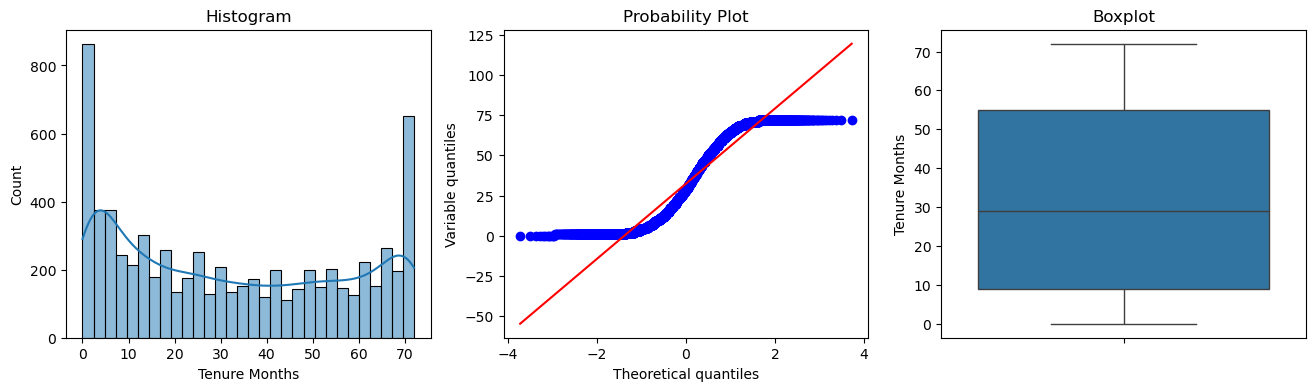

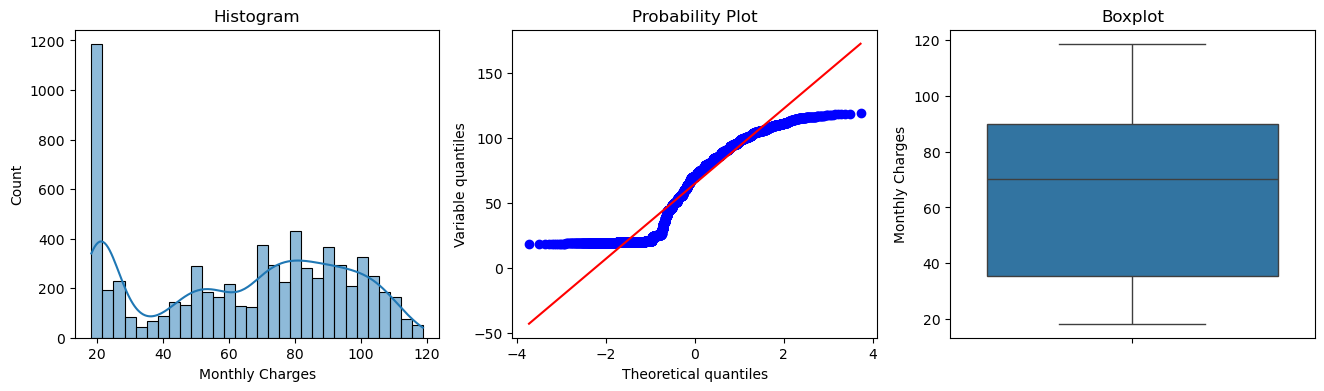

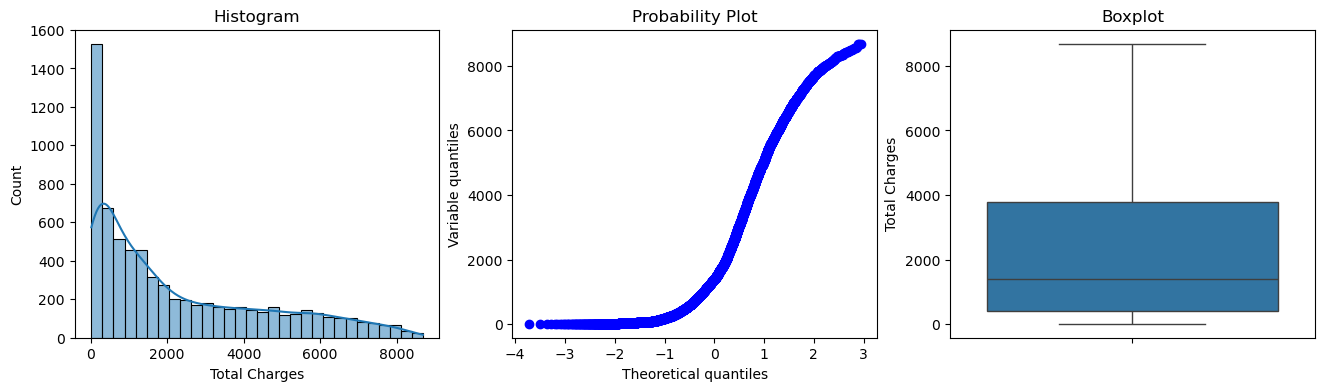

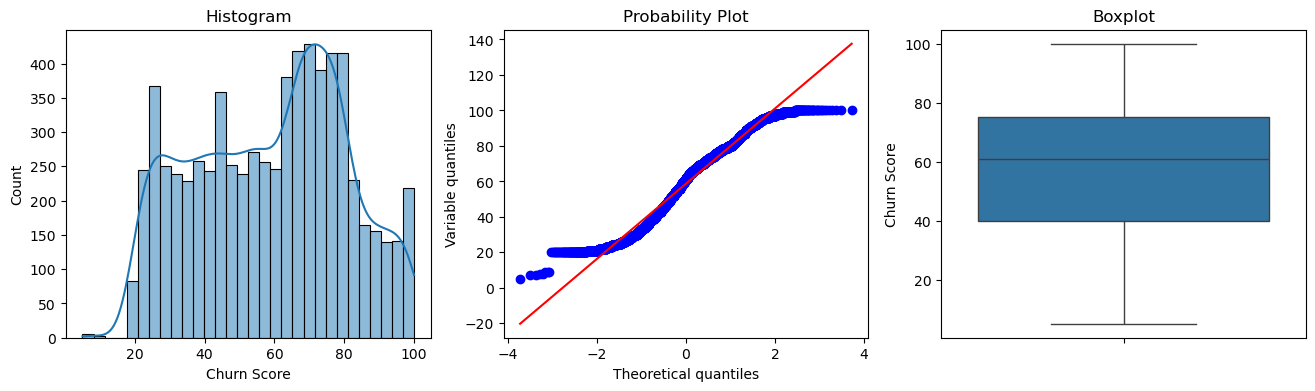

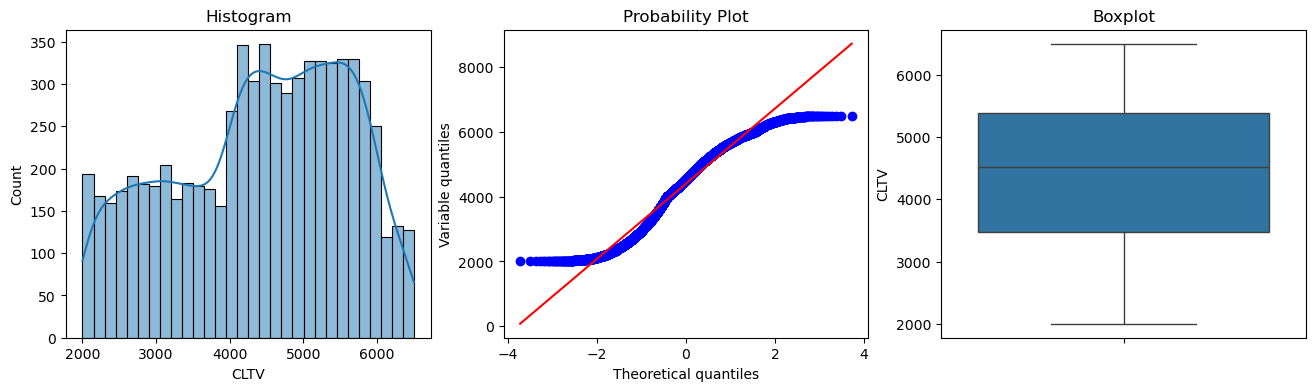

In [62]:
num_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV']

for col in num_cols:
    check_plot(data, col)
    

**Handling outlier with IQR**

In [55]:
def find_outlier_boundary(df, variable):

    # Mari kita hitung batas luar yang merupakan outlier
    # Rumus IQR: Q3-Q1
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    #LB: Q0 = Q1 - 3/2*IQR, UB: Q4 = Q3 + 3/2*IQR
    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [57]:
filtered_columns_EDA = []

for col in num_cols:
    upper_limit, lower_limit = find_outlier_boundary(data, col)

    # Check if there are values outside the boundary
    is_outlier = (data[col] > upper_limit) | (data[col] < lower_limit)
    
    if is_outlier.any():
        print(f"Column: {col} | Outliers detected | Upper: {upper_limit}, Lower: {lower_limit}")
        data = data[~is_outlier]
        filtered_columns_EDA.append(col)
    else:
        print(f"Column: {col} | No outliers detected. Skipping filtering.")

print("\nColumns that required filtering due to outliers:")
print(filtered_columns_EDA)

Column: Tenure Months | No outliers detected. Skipping filtering.
Column: Monthly Charges | No outliers detected. Skipping filtering.
Column: Total Charges | No outliers detected. Skipping filtering.
Column: Churn Score | No outliers detected. Skipping filtering.
Column: CLTV | No outliers detected. Skipping filtering.

Columns that required filtering due to outliers:
[]


Karena kita tidak memiliki outlier, kita bisa langsung interpretasi hasil plot di atas:
1. Histogram + KDE Plot – Menunjukkan bentuk distribusi (apakah simetris, miring/skewed, multimodal).

2. Probability Plot (Q-Q Plot) – Mengecek apakah distribusi mendekati normal (titik-titik mengikuti garis merah).

3. Boxplot – Menunjukkan median, IQR, dan outlier dengan cepat.

Untuk kelima kolom numerik di atas, kita bisa menyimpulkan bahwa:
1. `Churn Score`


   `Histogram`: Terlihat agak miring ke kiri (negatively skewed), tapi cukup menyebar.

    `Q-Q Plot`: Tidak mengikuti garis lurus (garis lurus itu distribusi normal).

    `Boxplot`: Tidak ada outlier. Median sekitar 60.

    `Interpretasi`: Distribusi churn score menunjukkan variasi yang luas, tidak semua pelanggan berada di risiko churn tinggi atau rendah.

3. `CLTV (Customer Lifetime Value)`

    `Histogram`: Distribusi mirip multimodal, tidak simetris.
    
    `Q-Q Plot`: Titik menyimpang dari garis → tidak normal.
    
    `Boxplot`: Sedikit miring ke kanan, menunjukkan beberapa nilai CLTV tinggi.
    
    `Interpretasi`: CLTV memiliki sebaran yang lebar dan banyak pelanggan dengan nilai CLTV menengah-tinggi. Distribusi ini tidak normal.

3. `Monthly Charges`

    `Histogram`: Terlihat bimodal (dua puncak) dan skewed ke kanan.
    
    `Q-Q Plot`: menyimpang besar dari garis lurus, bukan distribusi normal.
    
    `Boxplot`: Ada outlier, terutama di ujung kanan.
    
    `Interpretasi`: Ada dua segmen pelanggan, satu dengan biaya rendah (mungkin tanpa internet), dan satu lagi dengan biaya tinggi. Distribusi ini jelas tidak normal. Seingat saya pelanggan yang menggunakan DSL sangat sedikit, mereka hanya memilih antara tanpa internet atau fiber optic internet.

4. `Tenure Months`

    `Histogram`: Terlihat U-shaped, banyak pelanggan baru (tenure rendah) dan pelanggan loyal (tenure tinggi).
    
    `Q-Q Plot`: Sangat menyimpang dari garis lurus, jelas bukan distribusi normal.
    
    `Boxplot`: Sebaran cukup luas, tidak banyak outlier.
    
    `Interpretasi`: Banyak pelanggan churn di awal (tenure rendah), dan sebagian kecil tetap lama. Sangat penting untuk analisis churn. Distribusi bukan normal, tapi informasi bisnis sangat kuat.

5. `Total Charges`

    `Histogram`: Sangat miring ke kanan (right skewed), konsisten dengan kombinasi antara tenure dan monthly charges.
    
    `Q-Q Plot`: Jauh dari distribusi normal?
    
    `Boxplot`: Banyak nilai ekstrem, distribusi lebar.
    
    `Interpretasi`: Sebagian besar pelanggan memiliki total charges rendah, kemungkinan karena mereka pelanggan baru. Distribusi tidak normal.


**_Perlu uji hipotesis menggunakan test Shapiro-Wilk dan lainnya agar terlihat lebih jelas sifat datanya_**

### 3. Visualisasi Data Bivariat 
- Pilih pasangan variabel numerik yang memiliki kemungkinan korelasi. 
- Gunakan scatter plot atau heatmap untuk mengidentifikasi pola hubungan. 
- Perhatikan tren atau anomali yang muncul dari hasil visualisasi. 

_**Goal: Mengetahui bagaimana dua variabel berkorelasi satu sama lain.**_

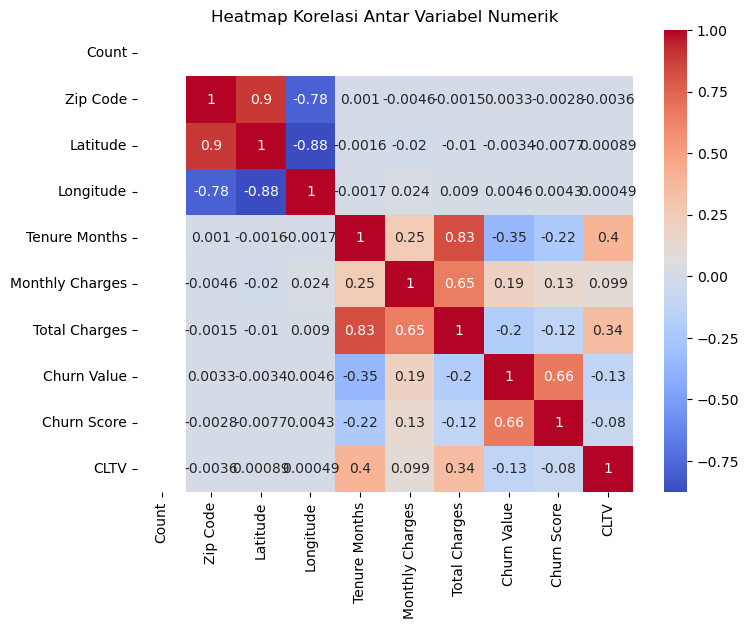

In [67]:
# Korelasi antar variabel numerik
numerical_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()

plt.figure(figsize=(8, 6))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()

# Scatterplot: hubungan antara MonthlyCharges dan TotalCharges
# plt.figure(figsize=(6, 4))
# sns.scatterplot(data=data, x='Monthly Charges', y='Total Charges', hue='Churn Label')
# plt.title('MonthlyCharges vs TotalCharges')
# plt.show()


#### Dari korelasi, kita bisa melihat 2 variabel yang berhubungan. Kita hanya perlu melihat variabel yg berkaitan yang nilai korelasinya di atas 0.5
#### Sebenarnya ada batas lebih strict, tapi karena ini hanya latihan, kita coba-coba aja
- Zip Code & Latitude = 0.9
- Zip Code & Longitude = -0.78
- Longitude & Latitude = -0.88
- Churn Value & Churn Score = 0.66
- Monthly Charges & Total Charges = 0.65
- Total Charges & Tenure Months = 0.83

I guess we will exclude Zip Code since it might not be numeric logically

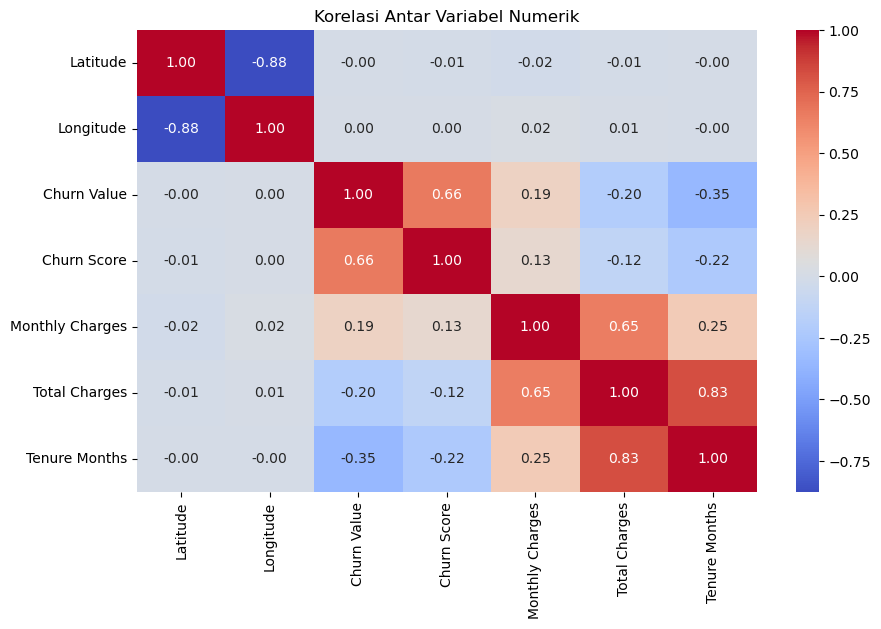

In [72]:
# Ambil subset numerik
num_cols = ['Latitude', 'Longitude',
            'Churn Value', 'Churn Score',
            'Monthly Charges', 'Total Charges', 'Tenure Months']

plt.figure(figsize=(10, 6))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

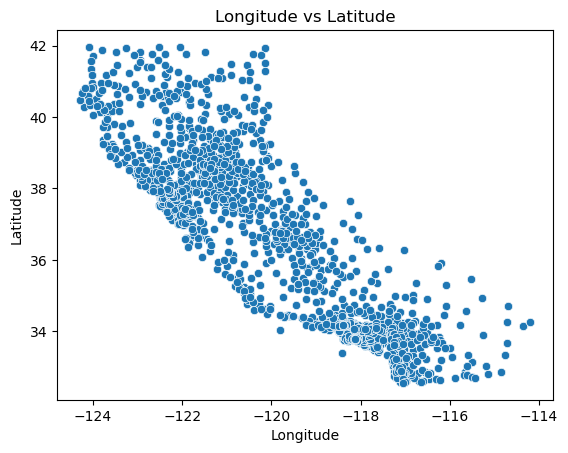

In [73]:
sns.scatterplot(x='Longitude', y='Latitude', data=df)
plt.title('Longitude vs Latitude')
plt.show()

#### Hubungan Latitude dan Longitude adalah negative correlated. Mungkin orang daerah tertentu dapat menjadi pelanggan, tidak diketahui cara menghubungkan dengan insight kecuali latitude, longitude dapat diubah menjadi lokasi real

In [78]:
data['Churn Score'].unique()

array([ 86,  67,  84,  89,  78, 100,  92,  77,  97,  74,  66,  65,  70,
        90,  82,  69,  81,  96,  87,  88,  75,  76,  95,  99,  80,  73,
        94,  83,  98,  71,  85,  68,  91,  93,  72,  79,  27,  61,  43,
        51,  58,  39,  35,  57,  53,  21,  38,  40,  41,  22,  25,  64,
        49,  62,  52,  59,  29,  33,  20,  30,  26,  54,  56,  55,  28,
        37,   9,  60,  24,  63,  23,  47,  32,   8,  46,  42,  48,  36,
        34,   7,  50,  44,  31,   5,  45])

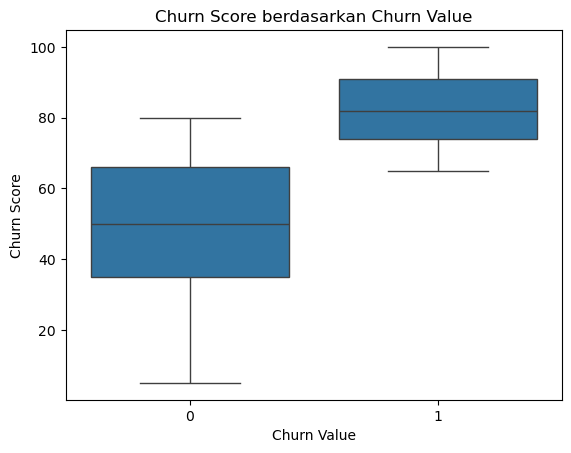

In [79]:
sns.boxplot(x='Churn Value', y='Churn Score', data=df)
plt.title('Churn Score berdasarkan Churn Value')
plt.xlabel('Churn Value')
plt.ylabel('Churn Score')
plt.show()

1. `Churn Value`

Definisi:
Churn Value adalah label biner (0 atau 1) yang menunjukkan apakah seorang pelanggan telah berhenti menggunakan layanan (churn) atau tidak.

0 = Tidak churn (masih menjadi pelanggan)

1 = Churn (sudah berhenti)

Tujuan:
Ini adalah target variabel utama untuk prediksi churn (klasifikasi). Misalnya, saat membangun model machine learning untuk prediksi churn, Churn Value digunakan sebagai label (y).

2. `Churn Score`

Definisi:
Churn Score adalah skor atau nilai numerik yang menunjukkan seberapa besar kemungkinan seorang pelanggan akan churn. Biasanya berkisar dari 0 sampai 100.

Skor rendah (misal < 40) = kemungkinan churn rendah

Skor tinggi (misal > 70) = kemungkinan churn tinggi

Tujuan:
Ini adalah variabel prediktor atau indikator risiko. Bisa digunakan:

Untuk segmentasi pelanggan berdasarkan risiko churn

Sebagai input untuk pengambilan keputusan bisnis (misalnya: beri diskon ke pelanggan dengan skor tinggi)

Terlihat dari boxplot, bagi yang tidak churn, churn score terlihat sangat moderate antara 40 hingga 60. Tidak terdapat indikasi kalau produk sangat populer bagi pelanggan yang tidak churn.

Sementara bagi yang churn, churn score sangat tinggi antara 70-90, yang berarti pelanggan yang churn sangat tidak puas terhadap produk/layanan yang diberikan.

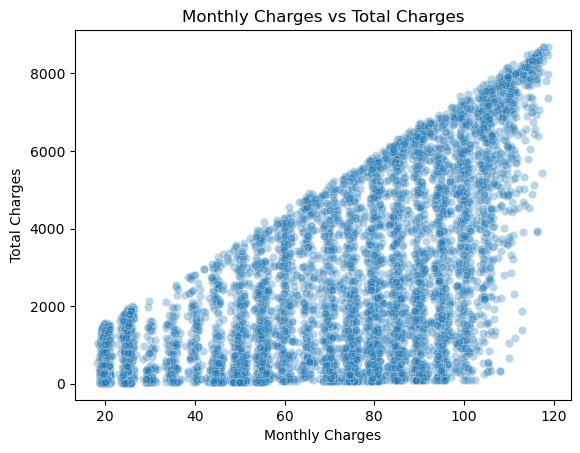

In [106]:
# Monthly Charges vs Total Charges
sns.scatterplot(x='Monthly Charges', y='Total Charges', data=data, alpha=0.3)
plt.title('Monthly Charges vs Total Charges')
plt.show()

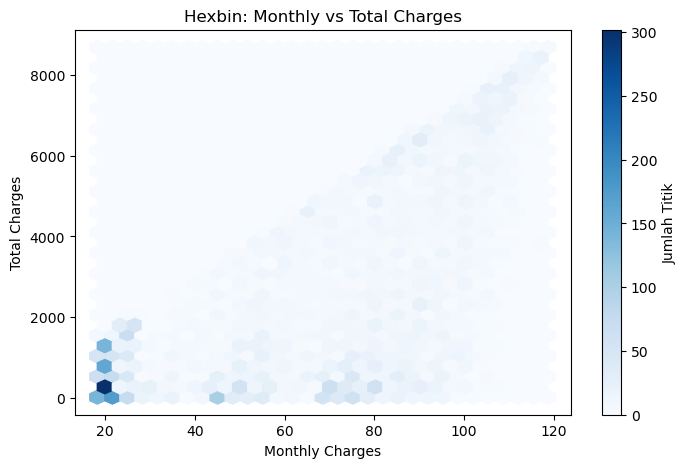

In [86]:
# Hexbin plot, karena terlalu padat
plt.figure(figsize=(8, 5))
plt.hexbin(data['Monthly Charges'], data['Total Charges'], gridsize=30, cmap='Blues')
plt.colorbar(label='Jumlah Titik')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.title('Hexbin: Monthly vs Total Charges')
plt.show()


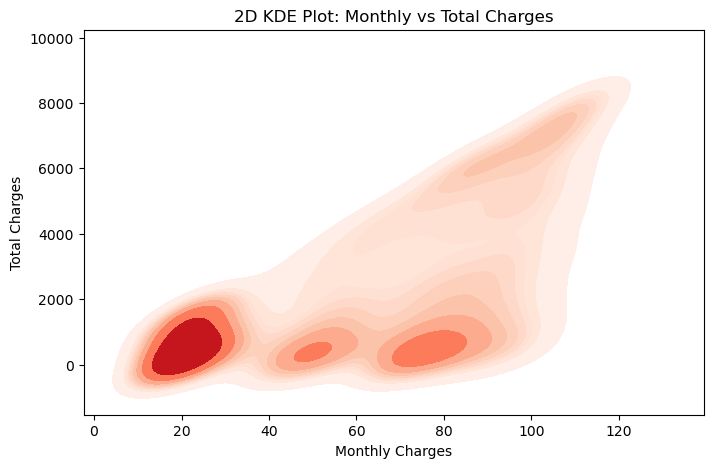

In [87]:
plt.figure(figsize=(8, 5))
sns.kdeplot(
    x=data['Monthly Charges'], 
    y=data['Total Charges'], 
    cmap='Reds', fill=True, thresh=0.05
)
plt.title('2D KDE Plot: Monthly vs Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()


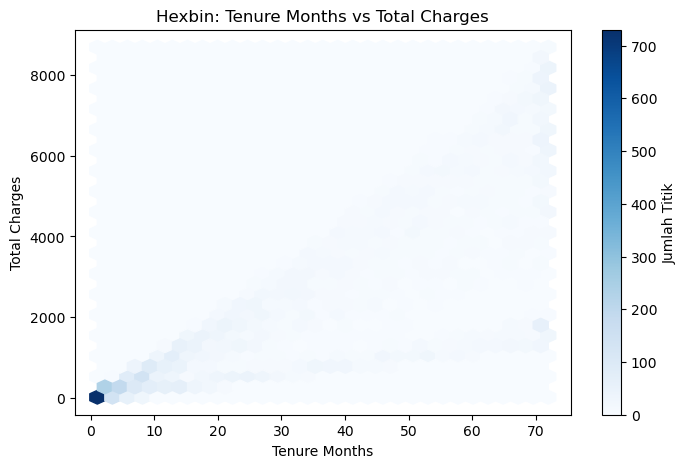

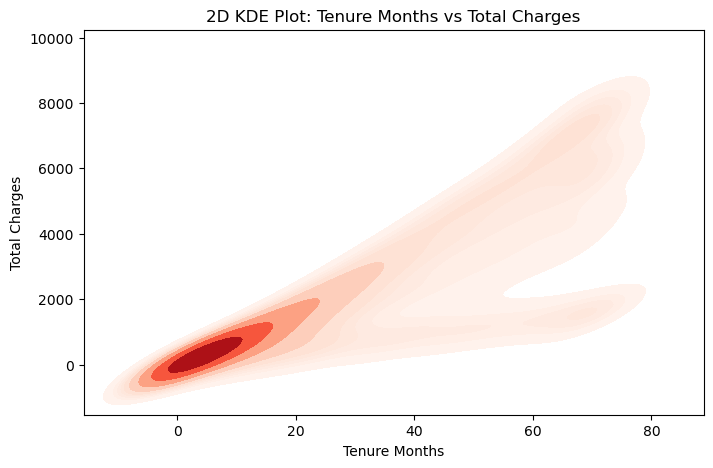

In [96]:
# Tenure Month vs Total Charges
# Hexbin plot, karena terlalu padat
plt.figure(figsize=(8, 5))
plt.hexbin(data['Tenure Months'], data['Total Charges'], gridsize=30, cmap='Blues')
plt.colorbar(label='Jumlah Titik')
plt.xlabel('Tenure Months')
plt.ylabel('Total Charges')
plt.title('Hexbin: Tenure Months vs Total Charges')
plt.show()

# 2d KDE
plt.figure(figsize=(8, 5))
sns.kdeplot(
    x=data['Tenure Months'], 
    y=data['Total Charges'], 
    cmap='Reds', fill=True, thresh=0.05
)
plt.title('2D KDE Plot: Tenure Months vs Total Charges')
plt.xlabel('Tenure Months')
plt.ylabel('Total Charges')
plt.show()


1. Hexbin: Monthly Charges vs Total Charges

Visualisasi: Setiap hexagon mewakili area dengan kepadatan titik tertentu (jumlah pelanggan).

Interpretasi:

Titik paling padat berada di Monthly Charges rendah (~20) dan Total Charges rendah (<1000), menunjukkan banyak pelanggan baru atau pelanggan yang churn lebih awal.

Ada pola naik diagonal: makin tinggi Monthly Charges, cenderung makin tinggi Total Charges, meskipun tidak linier sempurna karena durasi berbeda.

Namun distribusinya menyebar dan tidak padat merata, menandakan variasi besar dalam durasi langganan.

2. Hexbin: Tenure Months vs Total Charges

Interpretasi:

Kepadatan tinggi di Tenure rendah (<5 bulan) dan Total Charges rendah, artinya banyak pelanggan berhenti di awal.

Pola diagonal sangat jelas, pelanggan dengan masa aktif lebih lama cenderung menghasilkan Total Charges yang lebih tinggi.

Distribusi cenderung lebih linear dan teratur dibanding Monthly Charges vs Total Charges, karena durasi (tenure) adalah faktor utama yang membentuk Total Charges.

3. 2D KDE Plot: Monthly Charges vs Total Charges

Visualisasi: Garis kontur menunjukkan kepadatan pelanggan berdasarkan dua variabel.

Interpretasi:

Terlihat beberapa "cluster" densitas, terutama:

Banyak pelanggan di area Monthly Charges rendah dan Total Charges rendah

Beberapa kelompok lain di mid-high Monthly Charges, tapi Total Charges tetap rendah, mungkin karena pelanggan dengan kontrak mahal namun churn cepat.

Distribusi tidak merata dan ada beberapa outlier group.

4. 2D KDE Plot: Tenure Months vs Total Charges

Interpretasi:

Terdapat distribusi linier dan terarah — semakin panjang Tenure, semakin besar Total Charges.

Titik terpadat masih berada di Tenure rendah, menunjukkan churn awal masih dominan.

Lebih bersih dibanding Monthly Charges karena tenure memang variabel utama dalam membentuk Total Charges (Monthly Charges × Tenure, kira-kira).

| Plot               | Insight Utama                                                      |
| ------------------ | ------------------------------------------------------------------ |
| **Hexbin Monthly** | Banyak pelanggan bayar sedikit dan churn cepat. Ada variasi besar. |
| **Hexbin Tenure**  | Hubungan linear kuat antara Tenure dan Total Charges.              |
| **KDE Monthly**    | Terdapat beberapa cluster, termasuk high-charge-low-tenure.        |
| **KDE Tenure**     | Pola jelas dan stabil, Total Charges bertumbuh dengan waktu.       |

### 4. **Visualisasi Data Kategorikal** 
- Pilih metode visualisasi yang sesuai untuk membandingkan distribusi 
kategori. 
- Pastikan representasi visual yang digunakan dapat dengan mudah 
diinterpretasikan. 
- Bandingkan distribusi kategori terhadap variabel lain jika relevan. 

`Goal`: Memahami bagaimana data kategorikal terdistribusi dan hubungannya 
dengan variabel lain. 

In [107]:
categorical_cols = data.select_dtypes(include='object').columns.tolist()
categorical_cols

['CustomerID',
 'Country',
 'State',
 'City',
 'Lat Long',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Churn Label']

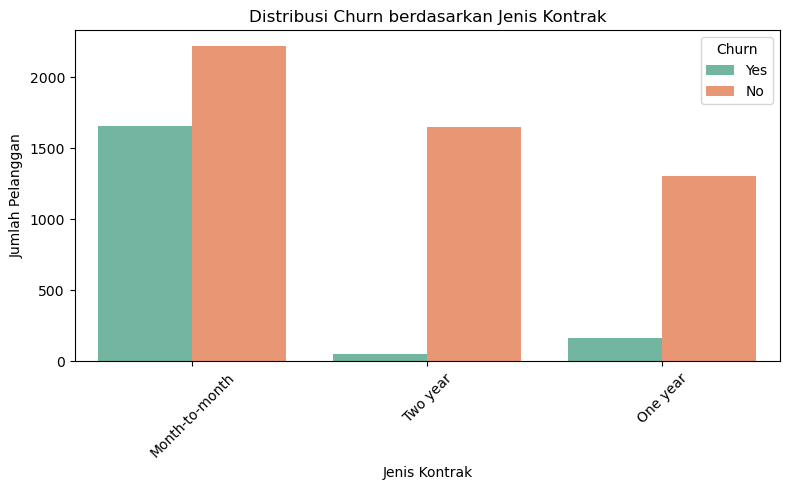

In [111]:
# Buat countplot untuk melihat jumlah churn per jenis kontrak
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn Label', data=data, palette='Set2')
plt.title('Distribusi Churn berdasarkan Jenis Kontrak')
plt.xlabel('Jenis Kontrak')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

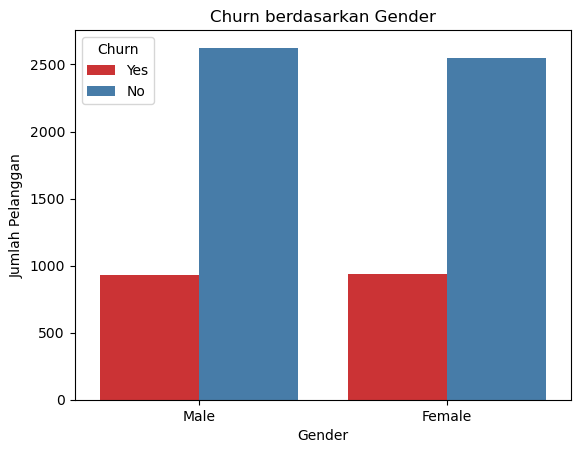

In [117]:
sns.countplot(x='Gender', hue='Churn Label', data=df, palette='Set1')
plt.title('Churn berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Churn')
plt.show()

In [118]:
pd.crosstab(data['Gender'], data['Partner'], normalize='index') * 100

Partner,No,Yes
Gender,,
Female,51.605505,48.394495
Male,51.786217,48.213783


Text(0.5, 1.0, 'Distribusi Partner berdasarkan Gender')

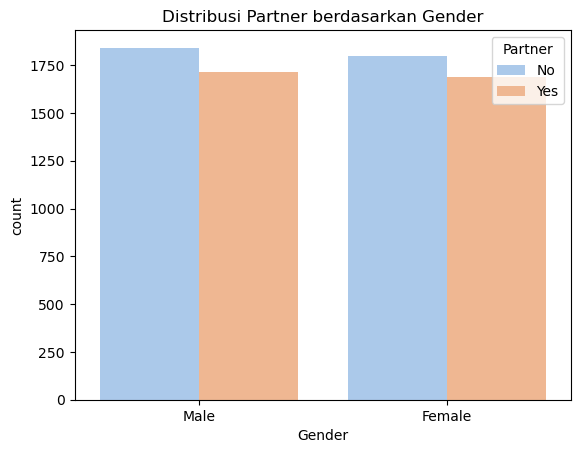

In [119]:
sns.countplot(x='Gender', hue='Partner', data=data, palette='pastel')
plt.title('Distribusi Partner berdasarkan Gender')

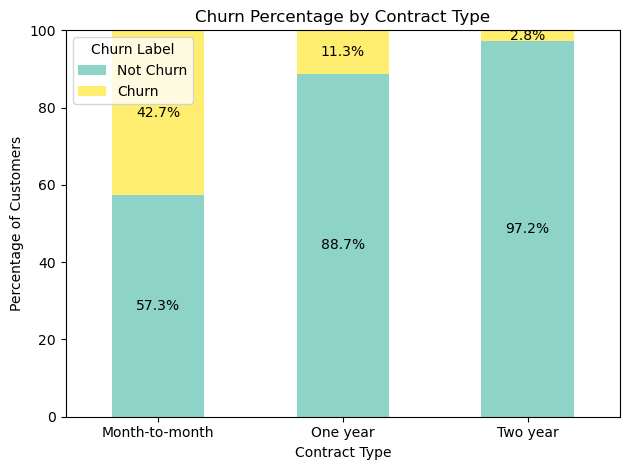

In [103]:
# Step 1: Group and unstack (count)
stack_data = df.groupby(['Contract', 'Churn Label']).size().unstack()

# Step 2: Convert to percentages (row-wise)
stack_percent = stack_data.div(stack_data.sum(axis=1), axis=0) * 100

# Step 3: Plot
stack_percent.plot(kind='bar', stacked=True, colormap='Set3')

# Step 4: Beautify the plot
plt.title('Churn Percentage by Contract Type')
plt.ylabel('Percentage of Customers')
plt.xlabel('Contract Type')
plt.legend(title='Churn Label', labels=['Not Churn', 'Churn'])
plt.ylim(0, 100)
plt.xticks(rotation=0)

# Optional: Add percentage labels on the bars
for idx, contract in enumerate(stack_percent.index):
    total = 0
    for i, value in enumerate(stack_percent.loc[contract]):
        plt.text(idx, total + value / 2, f'{value:.1f}%', ha='center', va='center', color='black')
        total += value

plt.tight_layout()
plt.show()


### 5. Data Storytelling dengan Visualisasi 
- Gunakan kombinasi beberapa visualisasi untuk membentuk cerita yang 
bermakna. 
- Pastikan insight yang diperoleh dari visualisasi dapat dijelaskan dengan baik. 
- Perhatikan tata letak dan urutan visualisasi agar cerita yang disampaikan jelas. 

`Goal`: Mengkomunikasikan hasil analisis dengan cara yang menarik dan mudah 
dipahami.

C:\Users\valer\AppData\Local\Temp\ipykernel_12268\3473473449.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn Label', data=df, palette='pastel')


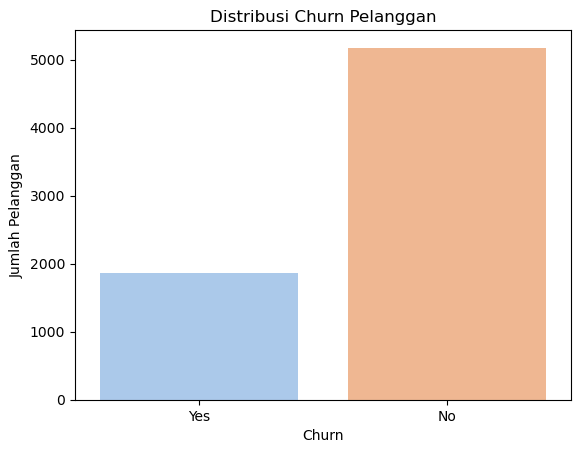

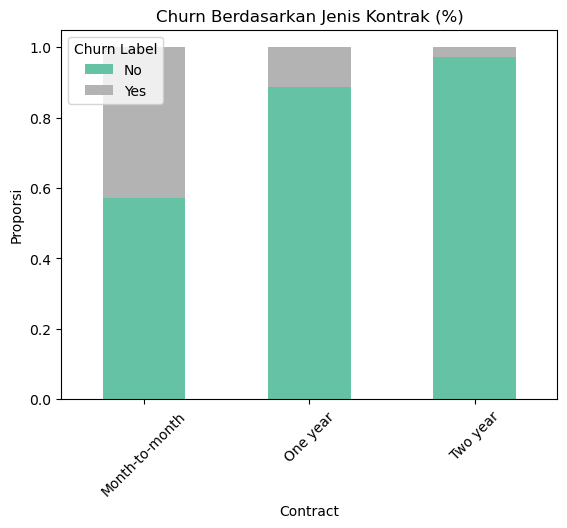

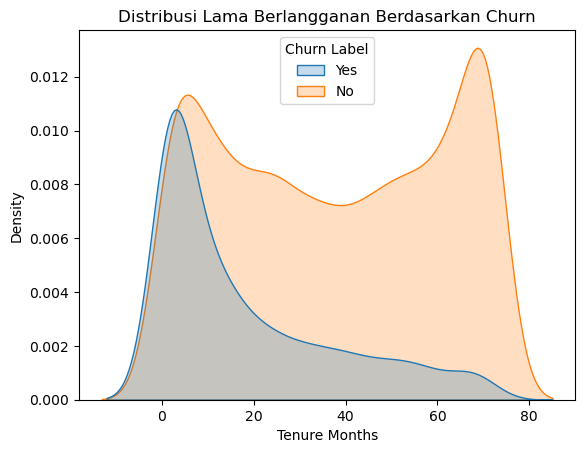

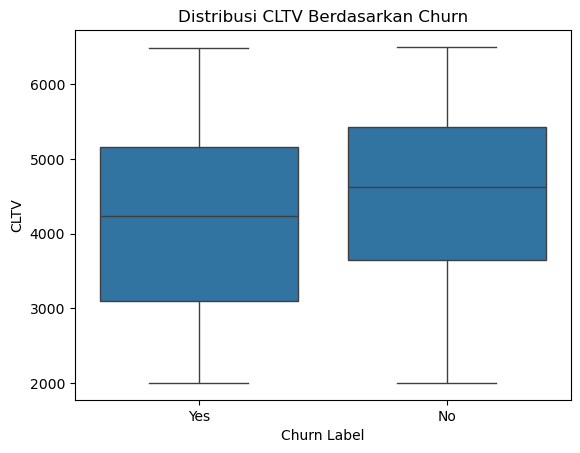

In [120]:
### 5. Data Storytelling dengan Visualisasi

# Untuk memahami perilaku churn pelanggan, kita akan menyusun cerita berbasis data visual sebagai berikut:

# a. Konteks Awal: Seberapa Besar Masalah Churn?
# Gunakan visualisasi countplot untuk melihat distribusi `Churn Label`.
sns.countplot(x='Churn Label', data=df, palette='pastel')
plt.title('Distribusi Churn Pelanggan')
plt.ylabel('Jumlah Pelanggan')
plt.xlabel('Churn')
plt.show()

# b. Siapa yang Lebih Sering Churn? Lihat Berdasarkan Jenis Kontrak
# Gunakan stacked bar chart untuk melihat hubungan `Contract` dan `Churn Label`
contract_churn = df.groupby(['Contract', 'Churn Label']).size().unstack()
(contract_churn.T / contract_churn.sum(axis=1)).T.plot(
    kind='bar', stacked=True, colormap='Set2'
)
plt.title('Churn Berdasarkan Jenis Kontrak (%)')
plt.ylabel('Proporsi')
plt.xticks(rotation=45)
plt.legend(title='Churn Label')
plt.show()

# c. Karakteristik Pelanggan yang Churn
# Gunakan KDE plot dan boxplot untuk membandingkan distribusi numerik berdasarkan `Churn Label`
sns.kdeplot(data=df, x='Tenure Months', hue='Churn Label', fill=True)
plt.title('Distribusi Lama Berlangganan Berdasarkan Churn')
plt.show()

sns.boxplot(x='Churn Label', y='CLTV', data=df)
plt.title('Distribusi CLTV Berdasarkan Churn')
plt.show()

# d. Kesimpulan Visual
# - Mayoritas pelanggan churn berasal dari kontrak bulanan.
# - Pelanggan churn cenderung memiliki masa berlangganan pendek dan nilai CLTV rendah.
# - Biaya bulanan tinggi juga umum pada pelanggan churn.

# Visualisasi ini membantu manajemen dalam:
# - Menargetkan pelanggan rentan churn.
# - Menyusun strategi loyalitas berbasis kontrak jangka panjang.
# - Menentukan insentif untuk pelanggan CLTV rendah namun berpotensi tinggi.